In [ ]:
##our agenda of this project is to help the category manager to to have the right produt at the right shelf
#1.planning what brand to stock in what layout ,involving qunatity 
#2.find out the types of coutmer who purchase chips and their purchasing behavior within the region
url1="https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv"

In [ ]:
url2="https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import datetime
from matplotlib.dates import DateFormatter
import datetime
from matplotlib.dates import DateFormatter

# text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

# statistical analysis
from scipy.stats import ttest_ind

# warnings
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
transactiondata=pd.read_excel(url2)
customerdata=pd.read_csv(url1)

In [ ]:
custozmerdata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transactiondata.head()

In [ ]:
transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
transactiondata.shape

(264836, 8)

In [ ]:
transactiondata['TXN_ID'].nunique()
##TXN_ID is not unique in each row that means a custmer can purachase multiple brand of chips in a sinle transaction
##row in the dataset corresponds to the purchase of a single brand of chips and a customer can buy multiple brands in one single transaction

263127

In [ ]:
##lets look for duplicated TXN_ID 
u=transactiondata[transactiondata.duplicated(['TXN_ID'])]

In [ ]:
#@title Default title text
u.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,43605,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,43391,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,43351,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,43315,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
922,43401,47,47204,42616,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
953,43609,48,48179,44177,56,Cheezels Cheese Box 125g,2,4.2
1048,43559,55,55036,48663,91,CCs Tasty Cheese 175g,2,4.2
1055,43282,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2
1143,43489,58,58121,53351,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [ ]:
##lets look at TXN_ID=7739
transactiondata.loc[transactiondata['TXN_ID']==7739,:]
##we can see that the same person has purachased 2 brand of chips in one sinle transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
376,43475,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.8
377,43475,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4


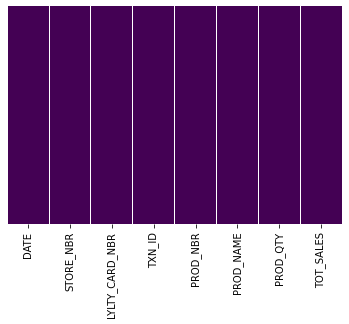

In [ ]:
##lets check is there any missing values
sns.heatmap(transactiondata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
##there are no missing values in the dataset

In [ ]:
##missingno.matrix(transactiondata)

In [ ]:
list(transactiondata.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [ ]:
##'date' column in the dataset is not in correct format
## lets change it into orginal format
def xldate_to_datetime(xldate):
	temp = datetime.datetime(1899, 12, 30)
	delta = datetime.timedelta(days=xldate)
	return temp+delta
                                      

In [ ]:
##apply above function to dataset
transactiondata['DATE']=transactiondata['DATE'].apply(xldate_to_datetime)

In [ ]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transactiondata['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [ ]:
##lets make new column named pack size
transactiondata['PACK_SIZE'] = transactiondata['PROD_NAME'].str.extract("(\d+)")
transactiondata['PACK_SIZE'] = pd.to_numeric(transactiondata['PACK_SIZE'])
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [ ]:
transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   PACK_SIZE       264836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [ ]:
# Create text cleaning function for 'PROD_NAME' feature
def clean_text(text):
    text = re.sub('[&/]', ' ', text) # remove special characters '&' and '/'
    text = re.sub('\d\w*', ' ', text) # remove product weights
    return text

In [ ]:
# Apply text cleaning function to 'PROD_NAME' column
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(clean_text)

In [ ]:
# Create one giant string and apply 'word_tokenize' to separate the words

cleanProdName = transactiondata['PROD_NAME']##save prodname 
string = ''.join(cleanProdName)##join it to a paragraph
prodWord = word_tokenize(string)##split them

In [ ]:
##prodWord

In [ ]:
##string

In [ ]:
# Apply 'fdist' function which computes the frequency of each token and put it into a dataframe
wordFrequency = fdist(prodWord)
freq_df = pd.DataFrame(list(wordFrequency.items()), columns = ["Word", "Frequency"]).sort_values(by = 'Frequency', ascending = False)

In [ ]:
##wordFrequency

In [ ]:
# Let's see the top 5 most frequent words

freq_df.head()

,Word,Frequency
10,Chips,49770
16,Kettle,40739
7,Smiths,28572
6,Cheese,27890
66,Pringles,24743


In [ ]:
# Drop rows with 'salsa' in 'PROD_NAME'
transactiondata['PROD_NAME'] =transactiondata['PROD_NAME'].apply(lambda x: x.lower())
transactiondata = transactiondata[~transactiondata['PROD_NAME'].str.contains("salsa")]
transactiondata['PROD_NAME'] = transactiondata['PROD_NAME'].apply(lambda x: x.title())

In [ ]:
##new_data = new_data[~new_data['PROD_NAME'].str.contains("salsa")]

In [ ]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150


In [ ]:
len(transactiondata)

246742

In [ ]:
##264836

In [ ]:
transactiondata.PROD_NAME.unique()

In [ ]:
# We shall explore 'PROD_QTY' and 'TOT_SALES' feature next

transactiondata['PROD_QTY'].value_counts()

# Max of 200 looks odd

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [ ]:
# We have two occurrences of 200 in the dataset
# Let's explore further

transactiondata.loc[transactiondata['PROD_QTY'] == 200, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380


In [ ]:
# Both these transactions have been made by the same person at the same store
# Let's see all the transactions this person has made by tracking his loyalty card number '226000'

transactiondata.loc[transactiondata['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE


In [ ]:
# This person only made two transactions over the entire year so unlikely to be a retail customer 
# He or she is most likely purchasing for commercial purposes
# Safe to drop these this customer in both 'transactionData' and 'customerData' dataset

transactiondata.drop(transactiondata.index[transactiondata['LYLTY_CARD_NBR'] == 226000], inplace = True)
customerdata.drop(customerdata.index[customerdata['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [ ]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150


In [ ]:
##lets look for with chip has more sale or more need
transactiondata['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil   Pesto         3304
Kettle Tortilla Chpshny Jlpno Chili       3296
Cobs Popd Swt Chlli  Sr Cream Chips       3269
Tyrrells Crisps     Ched   Chives         3268
Cobs Popd Sea Salt  Chips                 3265
                                          ... 
Sunbites Whlegrn    Crisps Frch Onin      1432
Rrd Pc Sea Salt                           1431
Ncc Sour Cream      Garden Chives         1419
French Fries Potato Chips                 1418
Ww Crinkle Cut      Original              1410
Name: PROD_NAME, Length: 105, dtype: int64

In [ ]:
transactiondata.sort_values(by=['DATE','STORE_NBR'],ascending=True)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
204456,2018-07-01,1,1233,266,110,Ww Original Corn Chips,1,1.9,200
238575,2018-07-01,1,1482,563,8,Smiths Crinkle Cut Chips Original,1,2.9,170
55720,2018-07-01,2,2117,712,73,Smiths Crinkle Cut Salt Vinegar,1,2.9,170
135774,2018-07-01,2,2283,895,108,Kettle Tortilla Chpshny Jlpno Chili,2,9.2,150
185609,2018-07-01,3,3054,1314,81,Pringles Original Crisps,2,7.4,134
...,...,...,...,...,...,...,...,...,...
25076,2019-06-30,271,271077,268661,56,Cheezels Cheese Box,2,4.2,125
25086,2019-06-30,271,271160,269155,27,Ww Supreme Cheese Corn Chips,2,3.8,200
80546,2019-06-30,271,271121,268918,75,Cobs Popd Sea Salt Chips,2,7.6,110
99000,2019-06-30,272,272074,269737,60,Kettle Tortilla Chpsfeta Garlic,2,9.2,150


In [ ]:
##lets group the dataset with repective of store n.o and corresponding total sales
##before that lets check the total n.o of stores 
transactiondata['STORE_NBR'].value_counts()
##so the stores are not eqally present in the dataset

226    1916
88     1786
165    1741
237    1714
93     1699
       ... 
206       2
252       2
31        2
76        1
92        1
Name: STORE_NBR, Length: 271, dtype: int64

In [ ]:
##lets group the dataset with repective of store n.o and corresponding total sales
##b = pd.pivot_table(transactiondata, values = 'TOT_SALES', index = 'STORE_NBR', aggfunc ='mean')
##b.sort_values(by=['TOT_SALES'],ascending=False).head(10)


In [ ]:
transactiondata.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [ ]:
o=transactiondata.groupby('STORE_NBR')['TOT_SALES'].agg(['sum','max','min','mean'],ascending=True)
o.sort_values(by=['sum','mean'],ascending=False).head(20)



,sum,max,min,mean
STORE_NBR,,,,
226,16544.65,23.0,3.30,8.634995
88,15445.85,22.8,3.25,8.648292
165,15188.35,23.0,3.25,8.723923
237,14830.60,28.5,3.30,8.652625
40,14427.30,21.6,3.30,8.727949
58,14256.95,22.0,3.25,8.672111
199,13975.90,27.0,3.30,8.713155
4,13709.25,17.7,3.25,8.649369
203,13623.40,21.6,3.30,8.677325


In [ ]:
# Now let's examine the number of transactions over time to see if there are any obvious data issues e.g. missing data

transactiondata['DATE'].nunique()

364

In [ ]:
# Look for the missing date 
# Turns out that it was Christmas Day so it makes sense because most retail stores are closed on that day

pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(transactiondata['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(transactiondata, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
b

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0
...,...
2019-06-26,0
2019-06-27,0
2019-06-28,0
2019-06-29,0


In [ ]:
c = a+b
c.fillna(0, inplace = True)

In [ ]:
c.head()

,TOT_SALES
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


In [ ]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head() 

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


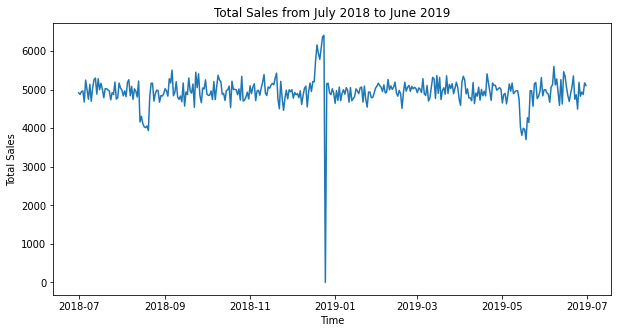

In [ ]:
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

# Comment: We can see that sales spike up during the December month and zero sale on Christmas

In [ ]:
# Confirm the date where sales count equals to zero

c[c['Total Sales'] == 0]

# It is indeed Christmas Day

,Total Sales
Date,
2018-12-25,0.0


In [ ]:
# Let's look at the December month only

c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5000.9
2018-12-02,4781.1
2018-12-03,4927.0
2018-12-04,4869.4
2018-12-05,4900.5


Text(0.5, 1.0, 'Total Sales in December')

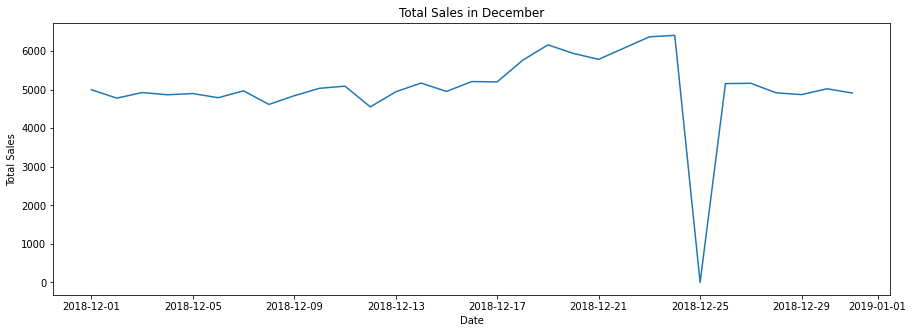

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

In [ ]:
# Reset index for 'c_december'

c_december.reset_index(drop = True, inplace = True)
c_december.head()

,Total Sales
0,5000.9
1,4781.1
2,4927.0
3,4869.4
4,4900.5


In [ ]:
# Relabel 'Date'

c_december['Date'] = c_december.index + 1
c_december.head()

,Total Sales,Date
0,5000.9,1
1,4781.1,2
2,4927.0,3
3,4869.4,4
4,4900.5,5


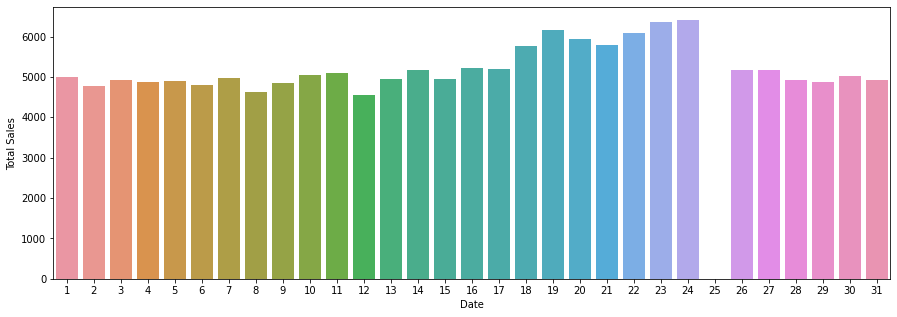

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Date', y ='Total Sales', data = c_december)

# Comment: No sales on Christmas Day (2018-12-25)

In [ ]:
transactiondata['PACK_SIZE'].unique()

# Comment: the largest size is 380g and the smallest size is 70g which seems reasonable

array([175, 170, 150, 330, 210, 270, 220, 125, 110, 134, 380, 180, 165,
       135, 250, 200, 160, 190,  90,  70])

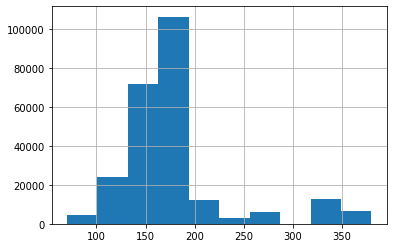

In [ ]:
# Check the distribution of 'PACK_SIZE'

transactiondata['PACK_SIZE'].hist()

In [ ]:
##let check with countplot
transactiondata['PACK_SIZE'].value_counts()
##more people tend to buy packsize of 175kg 150kg

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE, dtype: int64

In [ ]:
##lets check for pack size the quantity
p=transactiondata.groupby('PACK_SIZE').PROD_QTY.sum().sort_values(ascending = False)
pd.DataFrame(p)


,PROD_QTY
PACK_SIZE,
175,126467
150,76662
134,48019
110,42835
170,38088
165,29051
330,23999
380,12273
270,12049


In [ ]:
# Extract brand name from 'PROD_NAME' 
# Create a new column under 'TransactionData' called 'brand'

part = transactiondata['PROD_NAME'].str.partition()
transactiondata['BRAND'] = part[0]
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150,Kettle


In [ ]:
##lets look at the brand column morecloser
transactiondata['BRAND'].unique()
##we can see some duplicated names like eg:Ww and woolworths,Rrd and Red...

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'French', 'Rrd', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
##lets remove the duplicated names
transactiondata['BRAND'].replace('Ncc', 'Natural', inplace = True)
transactiondata['BRAND'].replace('Ccs', 'CCS', inplace = True)
transactiondata['BRAND'].replace('Smith', 'Smiths', inplace = True)
transactiondata['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transactiondata['BRAND'].replace('Dorito', 'Doritos', inplace = True)
transactiondata['BRAND'].replace('Ww', 'Woolworths', inplace = True)
transactiondata['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
transactiondata['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transactiondata['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

transactiondata['BRAND'].unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [ ]:
# Which brand had the most sales?

j=transactiondata.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)
pd.DataFrame(j)

,TOT_SALES
BRAND,
Kettle,390239.8
Doritos,226329.9
Smiths,217492.0
Pringles,177655.5
Infuzions,99047.6
Thins,88852.5
Red Rock Deli,87607.5
Twisties,81522.1
Tostitos,79789.6


In [ ]:
n=pd.pivot_table(transactiondata, values = 'TOT_SALES', index = 'BRAND', aggfunc = 'sum')
n=n.sort_values(by=['TOT_SALES'],ascending=False).head(10)


In [ ]:
n.reset_index(inplace=True)
n

,BRAND,TOT_SALES
0,Kettle,390239.8
1,Doritos,226329.9
2,Smiths,217492.0
3,Pringles,177655.5
4,Infuzions,99047.6
5,Thins,88852.5
6,Red Rock Deli,87607.5
7,Twisties,81522.1
8,Tostitos,79789.6
9,Cobs,70569.8


In [ ]:
n.columns

Index(['BRAND', 'TOT_SALES'], dtype='object')

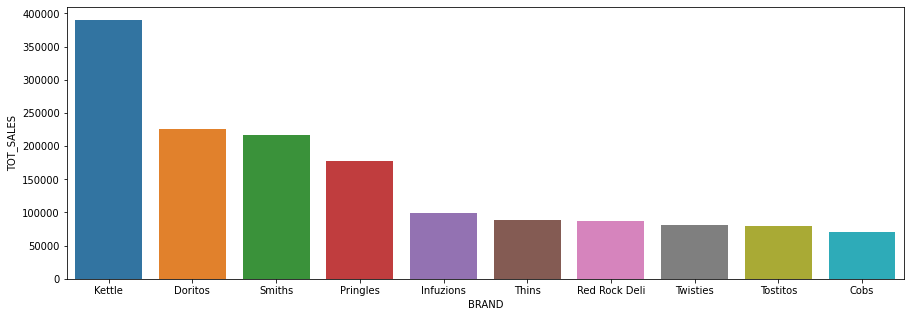

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'BRAND', y ='TOT_SALES', data = n)
##the kettle brand has more sales

In [ ]:
transactiondata['PROD_NBR'].unique()

array([  5,  66,  61,  69, 108,  16,  24,  42,  52, 114,  15,  92,  44,
        54,  94,  98,  93,  56,   7,  31,  32, 111,  46,  13,  99,  26,
        22,  48,  37,  36,  51, 107, 106,   4, 113,  45, 102, 104,   3,
        82,  88,  40,  73,  87,  84,  70,  89,  63,  25,  47,  71,  33,
        12,   8,  75, 100,  29,  30,  81,  67, 110,  28,   2,  14,  77,
        17,  83,  68,  96,  79,  23,  50,  78,   1,  86,  53,  72,  74,
         9,  91, 105,  90, 109,  27,  62, 112,  55,  18,  34,  49,  60,
        38, 103,  85,  95,  97,  20,  19,  21,   6,  80,  58,  10,  11,
        43])

In [ ]:
##lets look for prod_nbr and prod quantity
m=pd.pivot_table(transactiondata, values = 'PROD_QTY', index = 'PROD_NBR', aggfunc = 'sum')
m=m.sort_values(by=['PROD_QTY'],ascending=False).head(10)



In [ ]:
m.reset_index(inplace=True)
m

,PROD_NBR,PROD_QTY
0,102,6381
1,108,6309
2,75,6277
3,33,6256
4,74,6234
5,112,6227
6,63,6212
7,104,6206
8,28,6185
9,30,6180


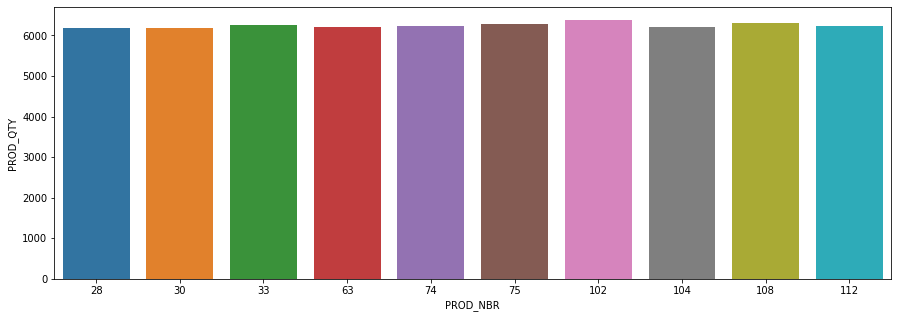

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'PROD_NBR', y ='PROD_QTY', data = m)
##the kettle brand has more sales

In [ ]:
transactiondata['PROD_NBR'].value_counts()
##the product with prod_number 102 is more sold

102    3304
108    3296
33     3269
112    3268
75     3265
       ... 
95     1432
11     1431
98     1419
29     1418
72     1410
Name: PROD_NBR, Length: 105, dtype: int64

In [ ]:
transactiondata[transactiondata['PROD_NBR']==102]
##the product more soled is kettele mozzarella basil pesto

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
45,2019-05-16,58,58324,54252,102,Kettle Mozzarella Basil Pesto,1,5.4,175,Kettle
247,2019-04-23,3,3326,2482,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
248,2019-04-29,3,3326,2483,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
356,2018-07-27,7,7133,6813,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
573,2019-04-07,24,24032,20456,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
...,...,...,...,...,...,...,...,...,...,...
264227,2019-03-16,246,246125,248123,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
264411,2018-08-22,251,251312,253427,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
264533,2018-08-12,259,259056,257774,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle
264648,2018-12-16,264,264374,263163,102,Kettle Mozzarella Basil Pesto,2,10.8,175,Kettle


In [ ]:
transactiondata['PROD_NAME'].value_counts()

[Kettle Mozzarella   Basil   Pesto         3304
 Kettle Tortilla Chpshny Jlpno Chili       3296
 Cobs Popd Swt Chlli  Sr Cream Chips       3269
 Tyrrells Crisps     Ched   Chives         3268
 Cobs Popd Sea Salt  Chips                 3265
                                           ... 
 Sunbites Whlegrn    Crisps Frch Onin      1432
 Rrd Pc Sea Salt                           1431
 Ncc Sour Cream      Garden Chives         1419
 French Fries Potato Chips                 1418
 Ww Crinkle Cut      Original              1410
 Name: PROD_NAME, Length: 105, dtype: int64]

In [ ]:
transactiondata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny Jlpno Chili,3,13.8,150,Kettle


# coustmerdata

In [ ]:
customerdata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


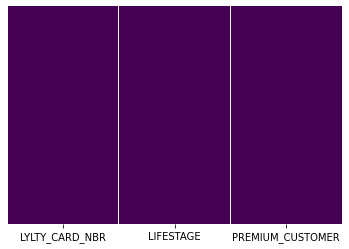

In [ ]:
sns.heatmap(customerdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')
##there are no missing values in the dataset

In [ ]:
len(customerdata)

72636

In [ ]:
# Let's see what those lifestages are

customerdata['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
# Counts for each lifestages

customerdata['LIFESTAGE'].value_counts().sort_values(ascending = False)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

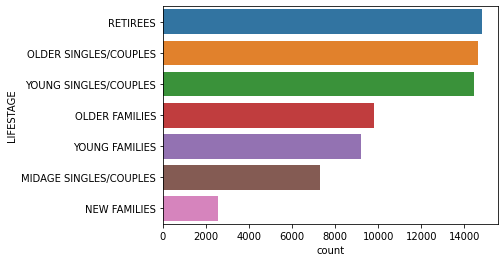

In [ ]:
sns.countplot(y = customerdata['LIFESTAGE'], order = customerdata['LIFESTAGE'].value_counts().index)
##in coustmer data retirees are more 

In [ ]:
# Counts for each 'PREMIUM_CUSTOMER'

customerdata['PREMIUM_CUSTOMER'].value_counts().sort_values(ascending = False)

# Comment: Mainstream has the highest count, followed by budget and finally premium

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

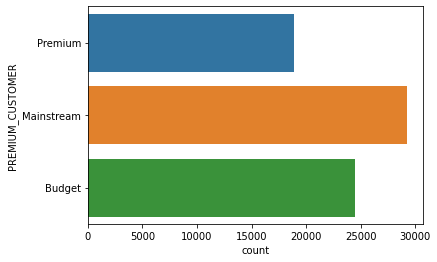

In [ ]:
# Visualise 'PREMIUM_CUSTOMER'

sns.countplot(y = customerdata['PREMIUM_CUSTOMER'])

In [ ]:
##lets combine both dataset
newdata=pd.merge(transactiondata, customerdata)

In [ ]:
newdata.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


# lets perform eda on this dataset

1.lets find the custmer segment who purchases more chips

2.check their life stage and purache behavior


In [ ]:
# Total sales by 'PREMIUM_CUSTOMER' and 'LIFESTAGE'

sales = pd.DataFrame(newdata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            156863.75
Mainstream       YOUNG SINGLES/COUPLES     147582.20
                 RETIREES                  145168.95
Budget           YOUNG FAMILIES            129717.95
                 OLDER SINGLES/COUPLES     127833.60
Mainstream       OLDER SINGLES/COUPLES     124648.50
Premium          OLDER SINGLES/COUPLES     123537.55
Budget           RETIREES                  105916.30
Mainstream       OLDER FAMILIES             96413.55
Premium          RETIREES                   91296.65
Mainstream       YOUNG FAMILIES             86338.25
                 MIDAGE SINGLES/COUPLES     84734.25
Premium          YOUNG FAMILIES             78571.70
                 OLDER FAMILIES             75242.60
Budget           YOUNG SINGLES/COUPLES      57122.10
Premium          MIDAGE SINGLES/COUPLES     54443.85
                 YOUNG SINGLES/COUPLES      39052.30
Budget           MIDAGE SINGLES/COUPLES     33345.70
                 NEW FAMILIES               20607.45
Mainstream       NEW FAMILIES               15979.70
Premium          NEW FAMILIES               10760.80

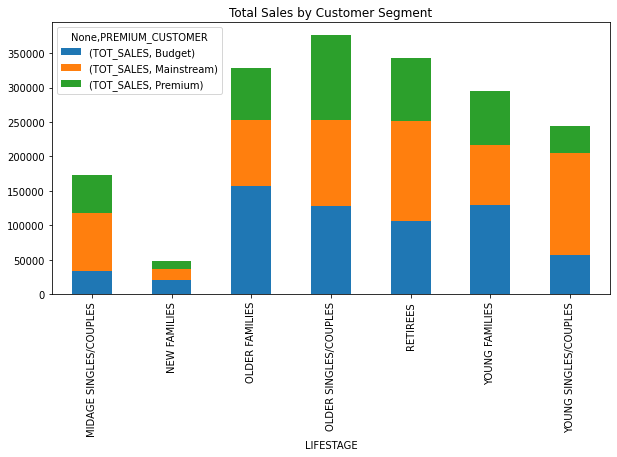

In [ ]:
# Visualise
salesPlot = pd.DataFrame(newdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (10, 5), title = 'Total Sales by Customer Segment')

# Comment: Sales are coming from budget older families, mainstream young singles/couples and mainstream retirees

In [ ]:
# Let's see if the higher sales are due to there being more customers who buy chips
# Number of customers by 'PREMIUM_CUSTOMER' and 'LIFESTAGE'
# Remember to take unique 'LYLTY_CARD_NBR'

customers = pd.DataFrame(newdata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7917
                 RETIREES                              6358
                 OLDER SINGLES/COUPLES                 4858
Budget           OLDER SINGLES/COUPLES                 4849
Premium          OLDER SINGLES/COUPLES                 4682
Budget           OLDER FAMILIES                        4611
                 RETIREES                              4385
                 YOUNG FAMILIES                        3953
Premium          RETIREES                              3812
Budget           YOUNG SINGLES/COUPLES                 3647

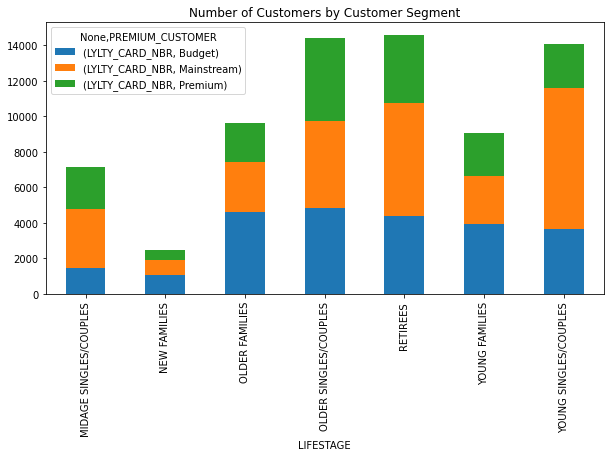

In [ ]:
# Visualise
customersPlot = pd.DataFrame(newdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (10, 5), title = 'Number of Customers by Customer Segment')

# Comment: There are more mainstream young singles/couples and retirees. This contributes to to more chips sales in these
# segments however this is not the major driver for the budget older families segment

In [ ]:
# Higher sales may also be driven by more units of chips being bought per customer
# Let's calculate the average units per customer by 'PREMIUM_CUSTOMER' and 'LIFESTAGE'
# Total quantity sold divided by unique customers

avg_units = newdata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / newdata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


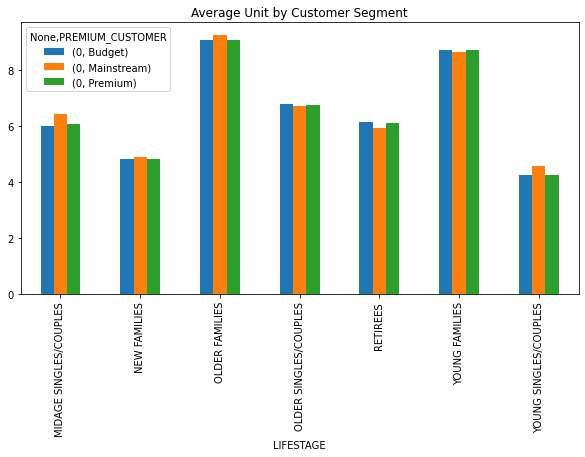

In [ ]:
# Visualise 
avgUnitsPlot = pd.DataFrame(newdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / newdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
avgUnitsPlot.unstack().plot(kind = 'bar', figsize = (10, 5), title = 'Average Unit by Customer Segment')

# Comment: Older families and young families buy more chips per customer

In [ ]:
# Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales
# Total sales divided by total quantity purchased

# Average price per unit by 'PREMIUM_CUSTOMER' and 'LIFESTAGE'
avg_price = newdata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / newdata.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969

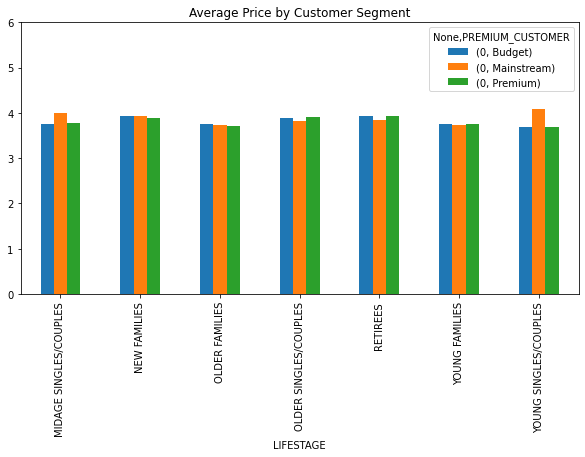

In [ ]:
# Visualise 
avgPricePlot = pd.DataFrame(newdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / newdata.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (10, 5), title = 'Average Price by Customer Segment', ylim = (0, 6))

# Comment: Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their 
# budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when
# they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by
# there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts

In [ ]:
# As this difference in average price per unit is not too large 
# Perform an independent t-test between mainstream vs non-mainstream midage and young singles/couples

# Create a new dataframe 'pricePerUnit'
pricePerUnit =newdata

# Create a new column under 'pricePerUnit' called 'PRICE'
pricePerUnit['PRICE'] = pricePerUnit['TOT_SALES'] / pricePerUnit['PROD_QTY']

# Let's have a look
pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [ ]:
k=pd.pivot_table(pricePerUnit,values='PRICE',index='PROD_NAME')
k=k.sort_values(by=['PRICE'],ascending=False)

In [ ]:
k.head(10)

,PRICE
PROD_NAME,
Dorito Corn Chp Supreme,6.368285
Smiths Crnkle Chip Orgnl Big Bag,5.900000
Smiths Crinkle Chips Salt Vinegar,5.700000
Cheezels Cheese,5.700000
Smiths Crinkle Original,5.700000
Doritos Cheese Supreme,5.700000
Kettle Mozzarella Basil Pesto,5.400000
Kettle Sea Salt And Vinegar,5.400000
Kettle Honey Soy Chicken,5.400000


In [ ]:
# Let's group our data into mainstream and non-mainstream

mainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (pricePerUnit['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (pricePerUnit['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

Text(0.5, 0, 'Price per Unit')

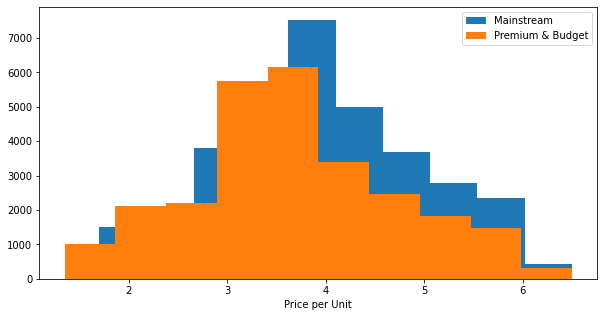

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [ ]:
# Let's have a look at their means

[np.mean(mainstream), np.mean(nonMainstream)]

# Mainstream has a higher average price per unit

[4.039785893795137, 3.706491319963857]

In [ ]:
# Perform t-test 

ttest_ind(mainstream, nonMainstream)

# Comment: Mainstream price per unit is significantly higher than non-mainstream 

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

In [ ]:
# Deep dive into specific customer segment for insights
# We have found quite a few interesting insights that we can dive deeper into 
# For example, we might want to target customers segments that contribute the most to sales to retain them to further increase sales
# Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they prefer any particular brand of chips

target = newdata.loc[(newdata['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (newdata['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = newdata.loc[(newdata['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (newdata['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag Sauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
221347,2019-05-02,1,1020,28,84,Grnwves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
221348,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221349,2019-02-07,1,1163,189,12,Natural Chip Co Tmato Hrb Spce,1,3.0,175,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [ ]:
# Affinity to brand

# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [ ]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002926,0.006538
CCS,0.011180,0.018445
Cheetos,0.008033,0.011759
Cheezels,0.017971,0.018904
Cobs,0.044638,0.038449


In [ ]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031553,0.025715,1.227025
Twisties,0.046184,0.037933,1.217506
Doritos,0.122761,0.101171,1.213397
Kettle,0.197985,0.166560,1.188667
Tostitos,0.045411,0.038350,1.184100
Pringles,0.119420,0.101110,1.181090
Cobs,0.044638,0.038449,1.160959
Infuzions,0.064679,0.057410,1.126622
Thins,0.060373,0.057159,1.056217


In [ ]:
# Comment: Mainstream young singles/couples are more likely to purchase Tyrrells chips compared to other brands

In [ ]:
# Affinity to pack size

# Target Segment
targetSize = target.loc[:, ['PACK_SIZE', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PACK_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PACK_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PACK_SIZE')['Non-Target Pack Affinity'].sum())

In [ ]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PACK_SIZE,,
70,0.003037,0.006284
90,0.006349,0.012613
110,0.106280,0.089575
125,0.003009,0.005976
134,0.119420,0.101110


In [ ]:
newdata['PACK_SIZE'].unique()

array([175, 160, 170, 150, 330, 165, 110, 210, 180, 200, 134, 270, 220,
       125, 135, 380, 250,  90, 190,  70])

In [ ]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PACK_SIZE,,,
270,0.031829,0.025070,1.269608
380,0.032160,0.025711,1.250827
330,0.061284,0.050974,1.202243
110,0.106280,0.089575,1.186492
134,0.119420,0.101110,1.181090
210,0.029124,0.024891,1.170020
135,0.014769,0.012931,1.142086
250,0.014355,0.012863,1.115959
170,0.080773,0.080347,1.005300


In [ ]:
# Comment: It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes

In [ ]:
# Which brand offers 270g pack size

newdata.loc[newdata['PACK_SIZE'] == 270, :].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
34,2019-05-18,9,9208,8634,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
79,2018-08-24,39,39167,35639,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
125,2019-05-06,54,54305,48304,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
132,2019-05-20,55,55073,48887,113,Twisties Chicken,1,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
209,2019-01-01,80,80182,78980,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
252,2018-11-18,84,84096,83672,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
253,2019-05-20,88,88320,87811,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
278,2018-07-11,102,102115,102207,15,Twisties Cheese,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
347,2019-04-05,118,118007,120735,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
350,2018-07-01,119,119051,122360,113,Twisties Chicken,2,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6


In [ ]:
# Is Twisties the only brand who sells 270g pack size

newdata.loc[newdata['PACK_SIZE'] == 270, 'BRAND'].unique()

# Twisties is the only brand that offers 270g pack size 

array(['Twisties'], dtype=object)

# conclusion

*   Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
*   We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments


*   (Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts
*   They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population




# Recomendations
The category manager may consider off-locating 'Tyrrells' chips in discretionary space near segments where young singles and couples frequent to increase the visibility and impulse behaviour
